In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [2]:
glass = pd.read_csv("/content/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass['Type'].value_counts(normalize=True)

2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: Type, dtype: float64

In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
x = glass.iloc[:,:9]
y = glass.iloc[:,-1]

In [6]:
XScaled  = x.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,-2.877034e-14,1.002345,-2.381516,-0.608273,-0.226229,0.261433,5.137232
Na,214.0,2.191393e-15,1.002345,-3.286943,-0.614158,-0.132382,0.512033,4.875637
Mg,214.0,-1.328117e-16,1.002345,-1.865511,-0.395774,0.552779,0.636168,1.254639
Al,214.0,-2.988264e-16,1.002345,-2.318616,-0.511756,-0.170460,0.371598,4.125851
Si,214.0,9.525091e-16,1.002345,-3.676472,-0.480029,0.179965,0.564962,3.570524
K,214.0,3.527811e-17,1.002345,-0.763919,-0.575650,0.089053,0.173582,8.780145
Ca,214.0,-3.154278e-16,1.002345,-2.484084,-0.504966,-0.251413,0.151806,5.094318
Ba,214.0,-6.640586e-17,1.002345,-0.352877,-0.352877,-0.352877,-0.352877,5.997210
Fe,214.0,-3.735330e-17,1.002345,-0.586451,-0.586451,-0.586451,0.442242,4.659881


In [7]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

# BUILDING KNN MODEL

In [8]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

# Evaluating Performance of kNN Model

In [11]:
print("train score",NNH.score(X_train,y_train))
print("test score",NNH.score(X_test,y_test))

train score 1.0
test score 0.7538461538461538


another way to find accuracy scores

In [17]:
from sklearn.metrics import accuracy_score
pred_y = NNH.predict(X_train)
print(accuracy_score(y_train,pred_y))
pred_test_y = NNH.predict(X_test)
print(accuracy_score(y_test,pred_test_y))

1.0
0.7538461538461538


In [19]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,pred_test_y)

array([[20,  4,  1,  0,  0,  0],
       [ 1, 18,  0,  0,  2,  0],
       [ 4,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  8]])

In [21]:
print(classification_report(y_test,pred_test_y))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        25
           2       0.69      0.86      0.77        21
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         2
           6       0.33      1.00      0.50         1
           7       1.00      0.89      0.94         9

    accuracy                           0.75        65
   macro avg       0.64      0.76      0.67        65
weighted avg       0.71      0.75      0.72        65



In [22]:
scores =[]
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

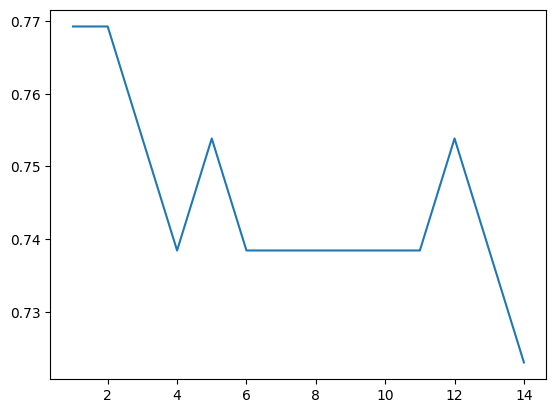

In [23]:
plt.plot(range(1,15),scores)

In [26]:
final_NNH = KNeighborsClassifier(n_neighbors= 2 , weights = 'distance' )

final_NNH.fit(X_train, y_train)
print("train score",final_NNH.score(X_train,y_train))
print("test score",final_NNH.score(X_test,y_test))

train score 1.0
test score 0.7692307692307693


In [27]:
print(classification_report(y_test,final_NNH.predict(X_test)))

              precision    recall  f1-score   support

           1       0.86      0.76      0.81        25
           2       0.71      0.81      0.76        21
           3       0.40      0.29      0.33         7
           5       0.67      1.00      0.80         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         9

    accuracy                           0.77        65
   macro avg       0.69      0.81      0.73        65
weighted avg       0.77      0.77      0.76        65



#final model test accuracy is 0.77
# f1 scores also increased compare to previous model of all classes.